In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

df = pd.read_csv("../data/Library_Usage.csv")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


Beispielfragen, die Du mit dem Datensatz beantworten und visualisieren kannst:

    Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?
    Wie viele Nutzer möchten per Mail informiert werden?
    Wie alt sind diese Nutzer durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?
    Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?
    
Fragen aus dem Pad

    Berechnung der Verteilung der Altersgruppen im Mission District
    
    Wie alt sind die Nutzer, die per Mail informiert werden möchten durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?
    
    Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt?
    
    Welche Altersgruppe verlängert im Mittel wie oft?


### Wie können wir die Verteilung der Altersgruppen im "Mission" Viertel noch visualisieren (außer als Kreuztabelle)?

In [2]:
pd.crosstab(
    df['Home Library Definition'] == "Mission",
    df['Age Range'],
       )

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Home Library Definition,,,,,,,,,,
False,35481,54923,28083,85012,62677,49519,20225,18993,29107,13782
True,2761,4021,1678,6071,4713,2973,1005,807,1034,368


In [3]:
sns.catplot(x='Age Range', hue=df['Home Library Definition'] == "Mission", 
            data=df, kind='count', aspect=5)

ValueError: could not broadcast input array from shape (25443,15) into shape (25443)

In [4]:
filter_mission_age = (df['Home Library Definition'] == 'Mission') & (df['Age Range'])
df.loc[filter_mission_age]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
10,0,ADULT,102,31,25 to 34 years,M6,Mission,June,2012,z,email,True,2009,False,9.0
18,4,WELCOME,0,0,35 to 44 years,M6,Mission,None,None,z,email,True,2012,False,9.0
32,0,ADULT,1989,3146,45 to 54 years,M6,Mission,May,2016,z,email,True,2003,False,8.0
43,0,ADULT,0,0,35 to 44 years,M6,Mission,None,None,z,email,True,2012,False,NaN
80,0,ADULT,35,0,25 to 34 years,M6,Mission,May,2016,z,email,True,2016,False,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423391,1,JUVENILE,92,10,10 to 19 years,M6,Mission,July,2016,z,email,True,2011,False,9.0
423395,2,YOUNG ADULT,74,0,10 to 19 years,M6,Mission,September,2013,p,phone,False,2008,False,9.0
423396,1,JUVENILE,463,14,10 to 19 years,M6,Mission,July,2016,p,phone,False,2009,False,6.0
423426,1,JUVENILE,373,216,0 to 9 years,M6,Mission,October,2014,z,email,True,2009,False,9.0


In [5]:
df_mission_age = df.loc[filter_mission_age]

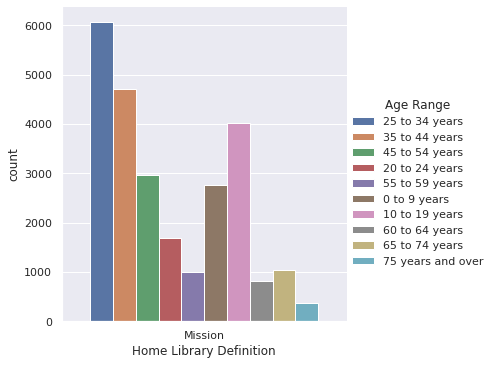

In [9]:
#order Age Range

sns.catplot(x='Home Library Definition', hue='Age Range', 
            data=df_mission_age, kind='count')

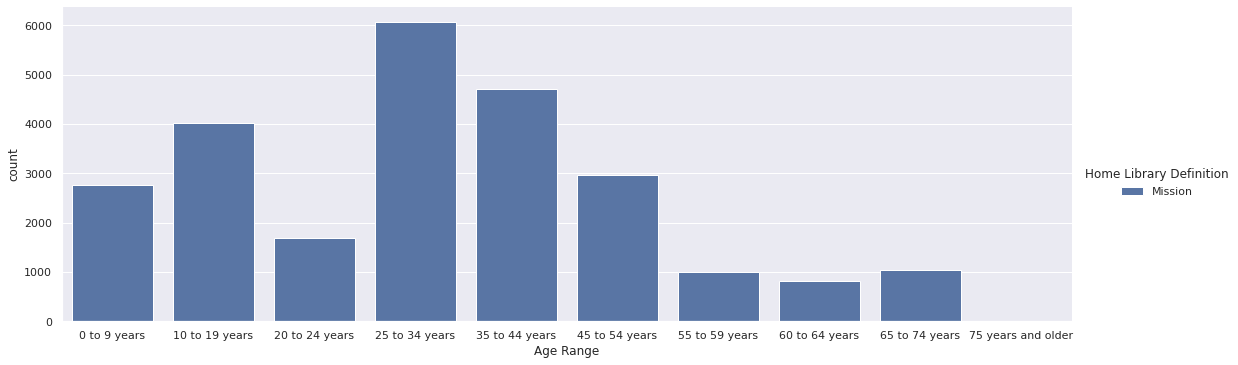

In [29]:
sns.catplot(x='Age Range', hue='Home Library Definition',
            data=df_mission_age, kind='count', aspect=3,  order=["0 to 9 years", "10 to 19 years", "20 to 24 years", "25 to 34 years", "35 to 44 years", "45 to 54 years", "55 to 59 years", "60 to 64 years", "65 to 74 years", "75 years and older"])

### Wie alt sind die Nutzer, die per Mail informiert werden möchten durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?

In [11]:
df['Notice Preference Definition'].value_counts()
#df['Print or Email'] = df['Notice Preference Definition'].isin(['email', 'print'])
#df['Print or Email']

email    323937
phone     68172
print     31336
none          3
Name: Notice Preference Definition, dtype: int64

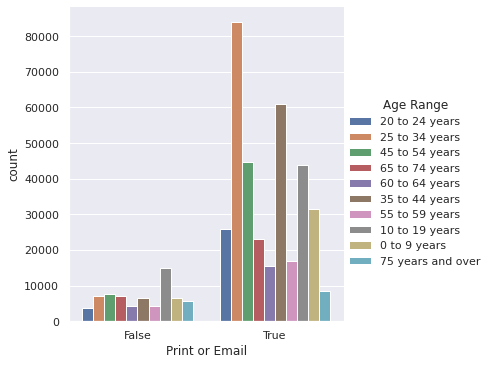

In [9]:
#Nach der Pause: Email und Print extra aufführen und mit Age Range visualisieren 

sns.catplot(x='Print or Email', hue='Age Range', 
            data=df, kind='count')

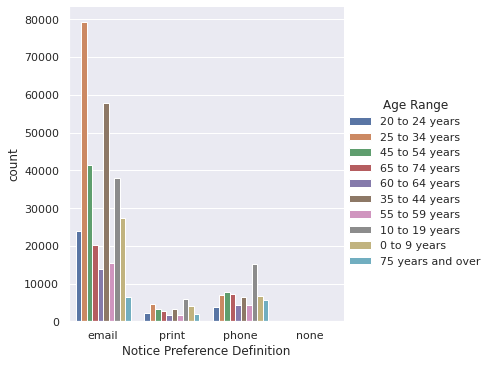

In [15]:
sns.catplot(x='Notice Preference Definition', hue='Age Range', 
            data=df, kind='count')

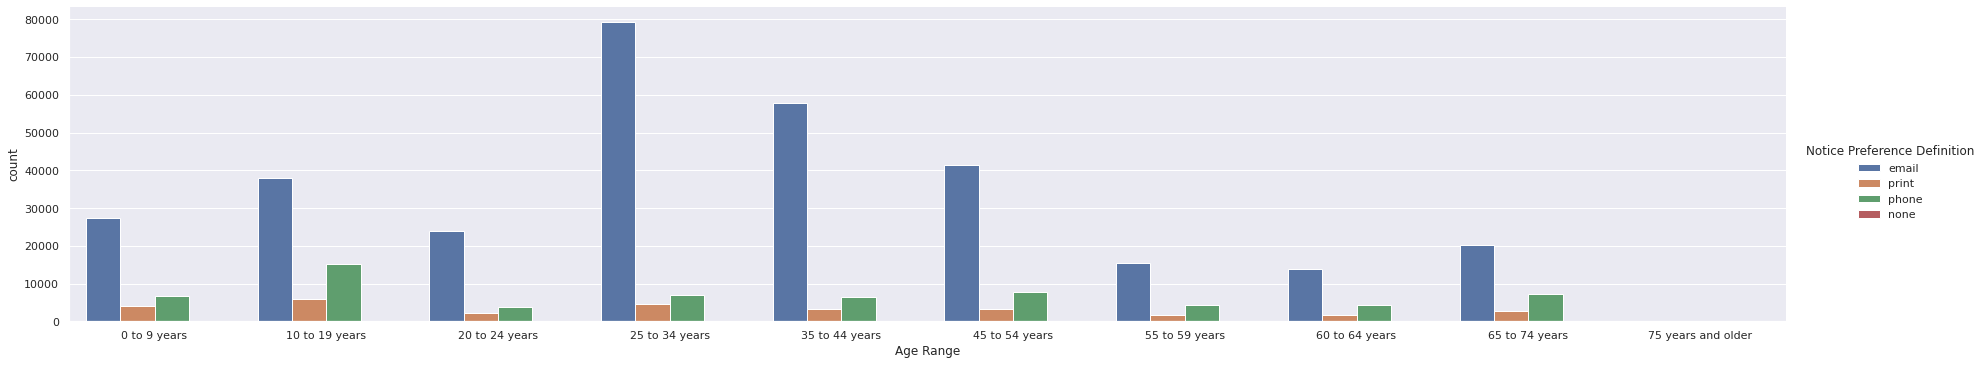

In [22]:
#order Age Range noch nach aspect

sns.catplot(x='Age Range', hue='Notice Preference Definition', 
            data=df, kind='count', aspect=5,  order=["0 to 9 years", "10 to 19 years", "20 to 24 years", "25 to 34 years", "35 to 44 years", "45 to 54 years", "55 to 59 years", "60 to 64 years", "65 to 74 years", "75 years and older"])

In [ ]:
#data=df filtern nach gewünschten Altersgruppen und nach Notice Preference Definition nach Email oder Print 

#df_1=...

#data=df_1...

In [18]:
filter_notice = df['Notice Preference Definition'].isin(['email', 'print'])
df.loc[filter_notice]

#df['Print or Email'] = df['Notice Preference Definition'].isin(['email', 'print'])

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423442,2,YOUNG ADULT,608,364,10 to 19 years,S7,Sunset,July,2016,z,email,True,2003,False,7.0
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016,z,email,True,2016,False,6.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015,z,email,True,2003,False,9.0


In [19]:
df_notice = df.loc[filter_notice]

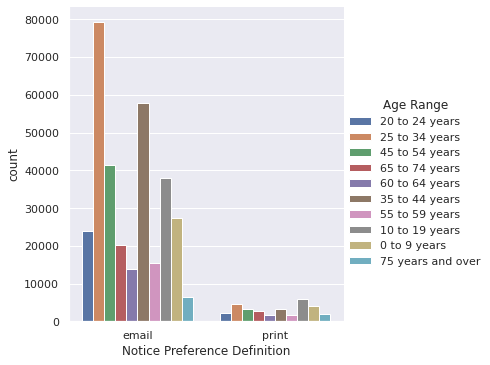

In [20]:
sns.catplot(x='Notice Preference Definition', hue='Age Range', 
            data=df_notice, kind='count')

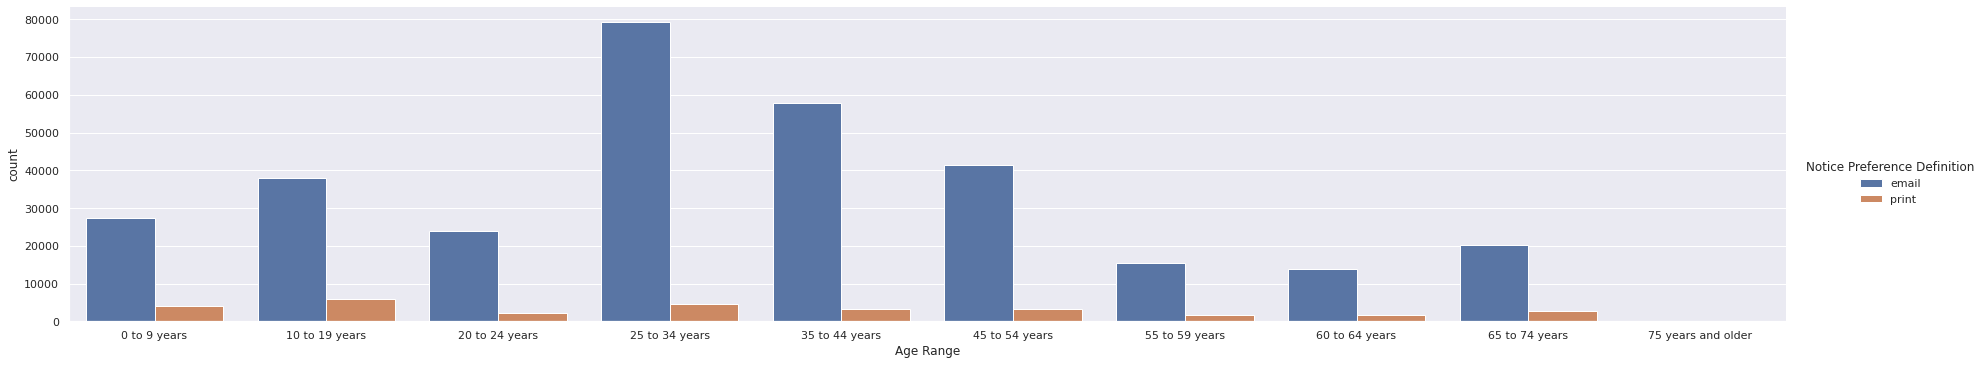

In [21]:
#order Age Range

sns.catplot(x='Age Range', hue='Notice Preference Definition', 
            data=df_notice, kind='count', aspect=5,  order=["0 to 9 years", "10 to 19 years", "20 to 24 years", "25 to 34 years", "35 to 44 years", "45 to 54 years", "55 to 59 years", "60 to 64 years", "65 to 74 years", "75 years and older"])

## Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt?

In [30]:
filter_totalcheck_age_0 = (df['Age Range'] == '0 to 9 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_0]
df_filterage0to9 = df.loc[filter_totalcheck_age_0]

filter_totalcheck_age_1 = (df['Age Range'] == '10 to 19 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_1]
df_filterage10to19 = df.loc[filter_totalcheck_age_1]

In [31]:
df_filterage0to9['Total Checkouts'].mean()

135.9883897285707

In [32]:
df_filterage10to19['Total Checkouts'].mean()

236.65104166666666

In [33]:
#Checkouts statt Renewals

filter_totalcheck_age_2 = (df['Age Range'] == '20 to 24 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_2]
df_filterage20to24 = df.loc[filter_totalcheck_age_2]
filter_totalcheck_age_3 = (df['Age Range'] == '25 to 34 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_3]
df_filterage25to34 = df.loc[filter_totalcheck_age_3]
filter_totalcheck_age_4 = (df['Age Range'] == '35 to 44 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_4]
df_filterage35to44 = df.loc[filter_totalcheck_age_4]
filter_totalcheck_age_5 = (df['Age Range'] == '45 to 54 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_5]
df_filterage45to54 = df.loc[filter_totalcheck_age_5]
filter_totalcheck_age_6 = (df['Age Range'] == '55 to 59 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_6]
df_filterage55to59 = df.loc[filter_totalcheck_age_6]
filter_totalcheck_age_7 = (df['Age Range'] == '60 to 64 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_7]
df_filterage60to64 = df.loc[filter_totalcheck_age_7]
filter_totalcheck_age_8 = (df['Age Range'] == '65 to 74 years') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_8]
df_filterage65to74 = df.loc[filter_totalcheck_age_8]
filter_totalcheck_age_9 = (df['Age Range'] == '75 years and older') & (df['Total Checkouts'] >= 0)
df.loc[filter_totalcheck_age_9]
df_filterage75older = df.loc[filter_totalcheck_age_9]

In [34]:
df_filterage20to24['Total Checkouts'].mean()

108.85669164342596

In [35]:
df_filterage25to34['Total Checkouts'].mean()

50.47241526958928

In [36]:
df_filterage35to44['Total Checkouts'].mean()

110.6653509422763

In [37]:
df_filterage45to54['Total Checkouts'].mean()

193.19084812923873

In [38]:
df_filterage55to59['Total Checkouts'].mean()

242.4242581252944

In [39]:
df_filterage60to64['Total Checkouts'].mean()

271.68964646464644

In [41]:
df_filterage65to74['Total Checkouts'].mean()

294.58451942536743

In [43]:
df_filterage75older['Total Checkouts'].mean()

nan

### Ist die Streuung zwischen den Gruppen gleich?

In [47]:
#Varianzkoeffizient für jede Altersgruppe berechnen
df_filterage0to9['Total Renewals'].std()/df_filterage0to9['Total Checkouts'].mean()

1.33479042692986

In [49]:
df_filterage10to19['Total Renewals'].std()/df_filterage10to19['Total Checkouts'].mean()

0.7420003358799706

In [50]:
df_filterage20to24['Total Renewals'].std()/df_filterage20to24['Total Checkouts'].mean()

1.2093377282089017

In [51]:
df_filterage25to34['Total Renewals'].std()/df_filterage25to34['Total Checkouts'].mean()

2.4366416747071558

In [52]:
df_filterage35to44['Total Renewals'].std()/df_filterage35to44['Total Checkouts'].mean()

1.8291690466825523

In [53]:
df_filterage45to54['Total Renewals'].std()/df_filterage45to54['Total Checkouts'].mean()

1.473982785783054

In [55]:
df_filterage55to59['Total Renewals'].std()/df_filterage55to59['Total Checkouts'].mean()

1.3861878174457254

In [56]:
df_filterage60to64['Total Renewals'].std()/df_filterage60to64['Total Checkouts'].mean()

1.2400686475044658

In [57]:
df_filterage65to74['Total Renewals'].std()/df_filterage65to74['Total Checkouts'].mean()

1.1647743669576525

In [58]:
df_filterage75older['Total Renewals'].std()/df_filterage75older['Total Checkouts'].mean()

nan